<a href="https://colab.research.google.com/github/Maks6666/ML/blob/main/telegram_spam_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

* Завантажте дані
* Розділіть дані на тренувальні та тестові
* У `MyTokenizer` добавте обробку тексту за допомогою `nltk`, застосуйте **стематизацію**
* Застосуйте `TfidfVectorizer`
* Застосуйте `TruncatedSVD`
* Натренуйте модель [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="linear"`, якщо вистачить пам'яті можна спробувати `kernel="rbf"`
* Виведіть результати

# Дані про телеграм

In [24]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/telegram_spam.csv")

In [25]:
from sklearn.model_selection import train_test_split

X = df["text"]
y = df["text_type"]

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [26]:
!pip install nltk

In [27]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
class MyTokenizer:
  def __init__(self):
    self.lemmatizer = WordNetLemmatizer()
  def __call__(self, text):
    tokens = text.split()

    lemitized_tokens = [self.lemmatizer.lemmatize(token) for token in tokens]

    return lemitized_tokens

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=MyTokenizer(), stop_words='english')

X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [29]:

# from sklearn.decomposition import TruncatedSVD

# pca = TruncatedSVD()

# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

In [33]:
from sklearn.svm import SVC

model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(kernel='linear')

              precision    recall  f1-score   support

         ham       0.96      0.97      0.96      2868
        spam       0.92      0.91      0.91      1202

    accuracy                           0.95      4070
   macro avg       0.94      0.94      0.94      4070
weighted avg       0.95      0.95      0.95      4070



[]

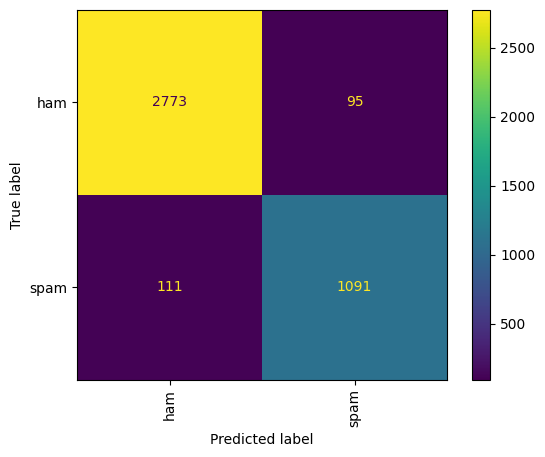

In [34]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [35]:
from sklearn.svm import SVC

model = SVC(kernel="rbf")
model.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

         ham       0.95      0.98      0.96      2868
        spam       0.94      0.88      0.91      1202

    accuracy                           0.95      4070
   macro avg       0.95      0.93      0.94      4070
weighted avg       0.95      0.95      0.95      4070



[]

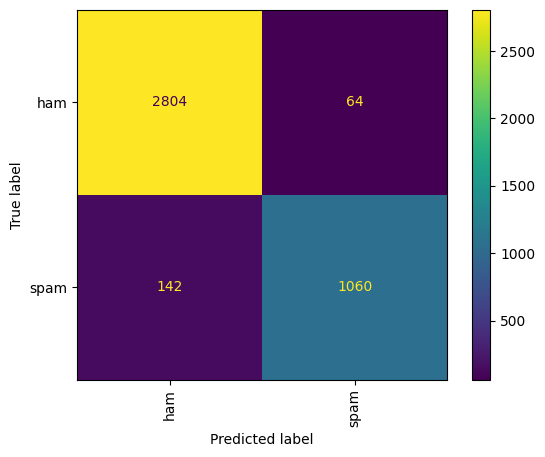

In [36]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()